# TUTORIAL: 
# Using the class Model in "essentials.physical_models"



In [2]:
from essentials.physical_models import *
import time
import matplotlib.pyplot as plt

#### 1. Initialise a model from physical_models using the defaults parameters
The available models are:
* Lorenz63
* Rijke
* Annular
* Van der Pol

In [78]:
model = Lorenz63()


#### 2. Forecast the model as a single case

First, save the history of the class and then get the obseervable history. 
Note that, although in the Lorenz case the observabes are equivalent to the state variables, in more complex models such as the Rijke tube model, the observables are a function of the state variables.

Elapsed time =  0.1223907470703125


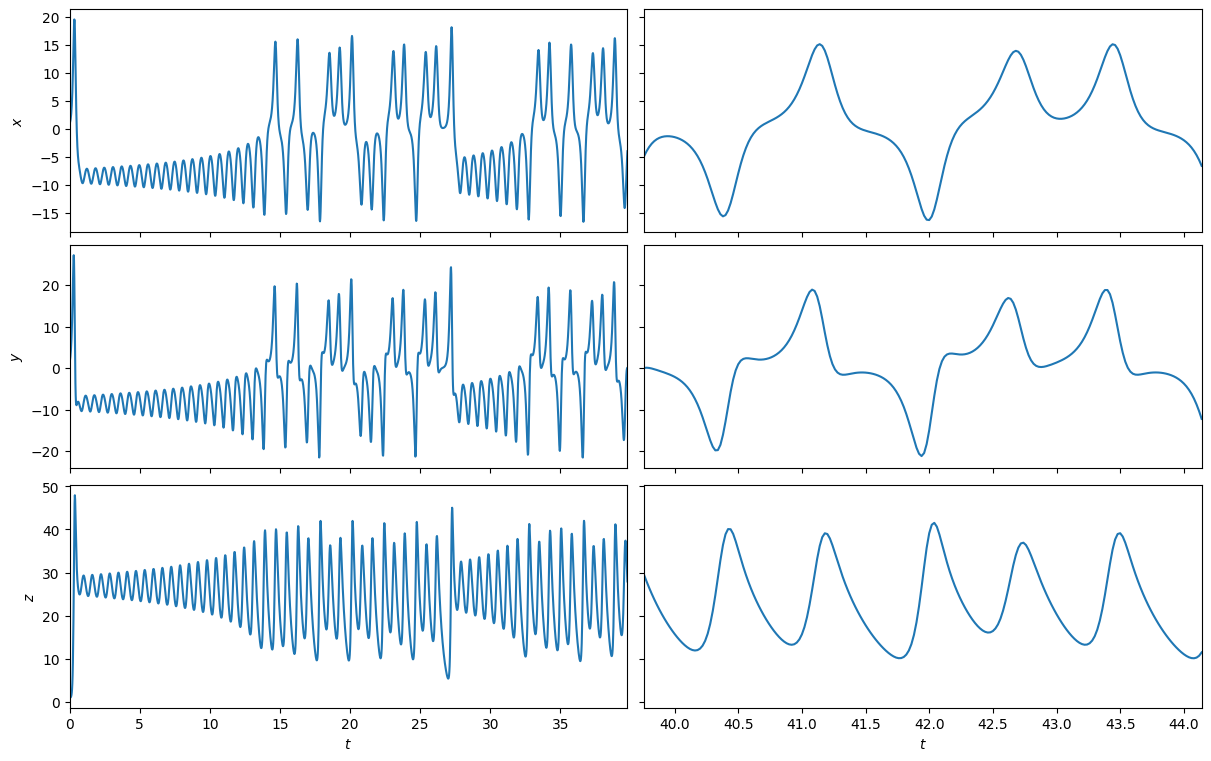

In [79]:
case = model.copy()
Nt_forecast = int(2 * case.t_transient / case.dt)

t1 = time.time()
state, t_ = case.time_integrate(Nt_forecast)
case.update_history(state, t_)

single_case_time = time.time() - t1
print('Elapsed time = ', str(single_case_time))

# history of the model observables 
t_h = case.hist_t
y = case.get_observable_hist()
lbl = case.obs_labels

# Plot the time evolution of the observables
t_zoom = int(case.t_CR / case.dt)

fig = plt.figure(figsize=(12, 7.5), layout="constrained")
axs = fig.subplots(case.Nq, 2, sharey='row', sharex='col')

for ii, ax in enumerate(axs):
    ax[0].plot(t_h, y[:, ii])
    ax[1].plot(t_h[-t_zoom:], y[-t_zoom:, ii])
    ax[0].set(ylabel=lbl[ii])
    if ii == case.Nq-1:
        ax[0].set(xlabel='$t$', xlim=[t_h[0], t_h[-t_zoom]])
        ax[1].set(xlabel='$t$', xlim=[t_h[-t_zoom], t_h[-1]])



#### 2. Forecast an ensemble of states
The class Model is paralellized to save computation time. 

In [84]:
case = model.copy()

# Generate ensemble
t1 = time.time()
case.init_ensemble(m=100, 
                   est_a=case.params[:2], 
                   std_psi=0.1, 
                   std_a=0.4, # the parameters uncertainty can also be defined individually in a dictionary
                   alpha_distr='uniform')

state, t_ = case.time_integrate(Nt=Nt_forecast)
# add the forecast to the model history
case.update_history(state, t_, reset=True)

ensemble_case_time = time.time() - t1
print('Elapsed ensemble time = {} < {} x {}'.format(ensemble_case_time, case.m, single_case_time))

Elapsed ensemble time = 1.1630558967590332 < 100 x 0.1223907470703125


In [85]:
# history of the model observables 
t_h = case.hist_t
y = case.get_observable_hist()
lbl = case.obs_labels

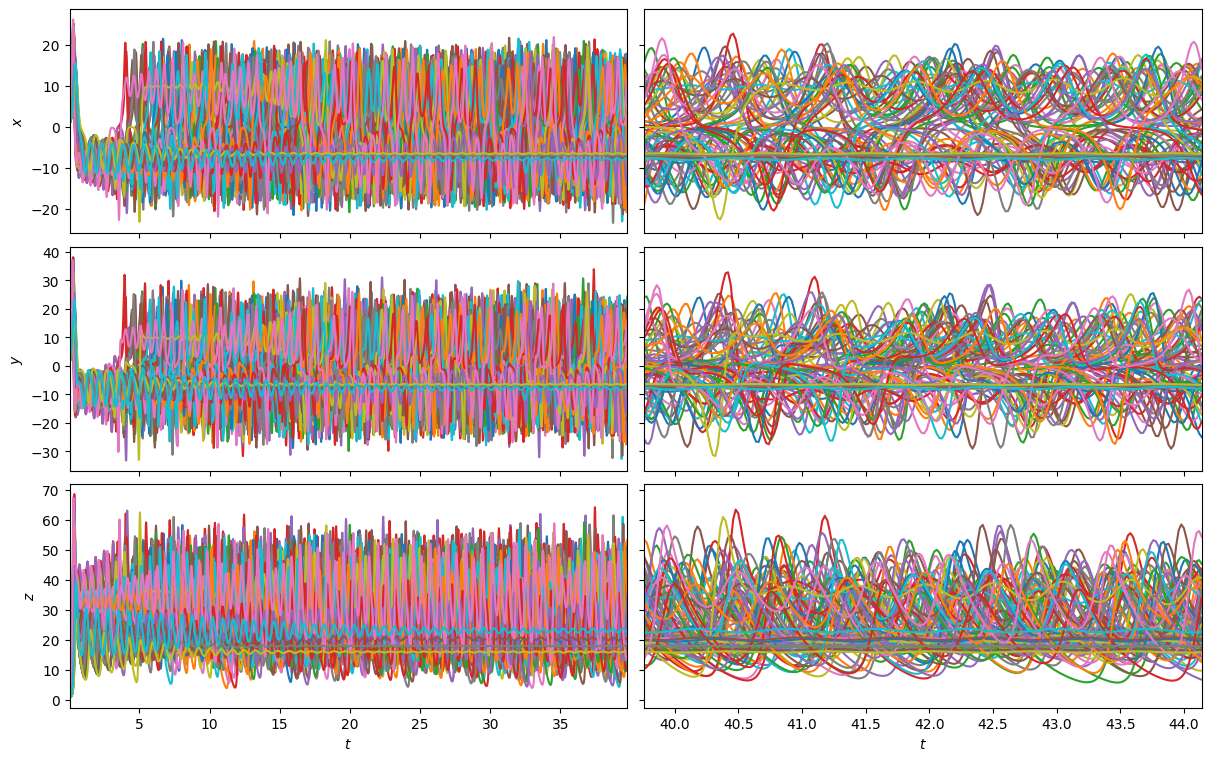

In [86]:
# Plot the time evolution of the observables
t_zoom = int(case.t_CR / case.dt)

fig = plt.figure(figsize=(12, 7.5), layout="constrained")
axs = fig.subplots(case.Nq, 2, sharey='row', sharex='col')

for ii, ax in enumerate(axs):
    ax[0].plot(t_h, y[:, ii])
    ax[1].plot(t_h[-t_zoom:], y[-t_zoom:, ii])
    ax[0].set(ylabel=lbl[ii])
    if ii == case.Nq-1:
        ax[0].set(xlabel='$t$', xlim=[t_h[0], t_h[-t_zoom]])
        ax[1].set(xlabel='$t$', xlim=[t_h[-t_zoom], t_h[-1]])




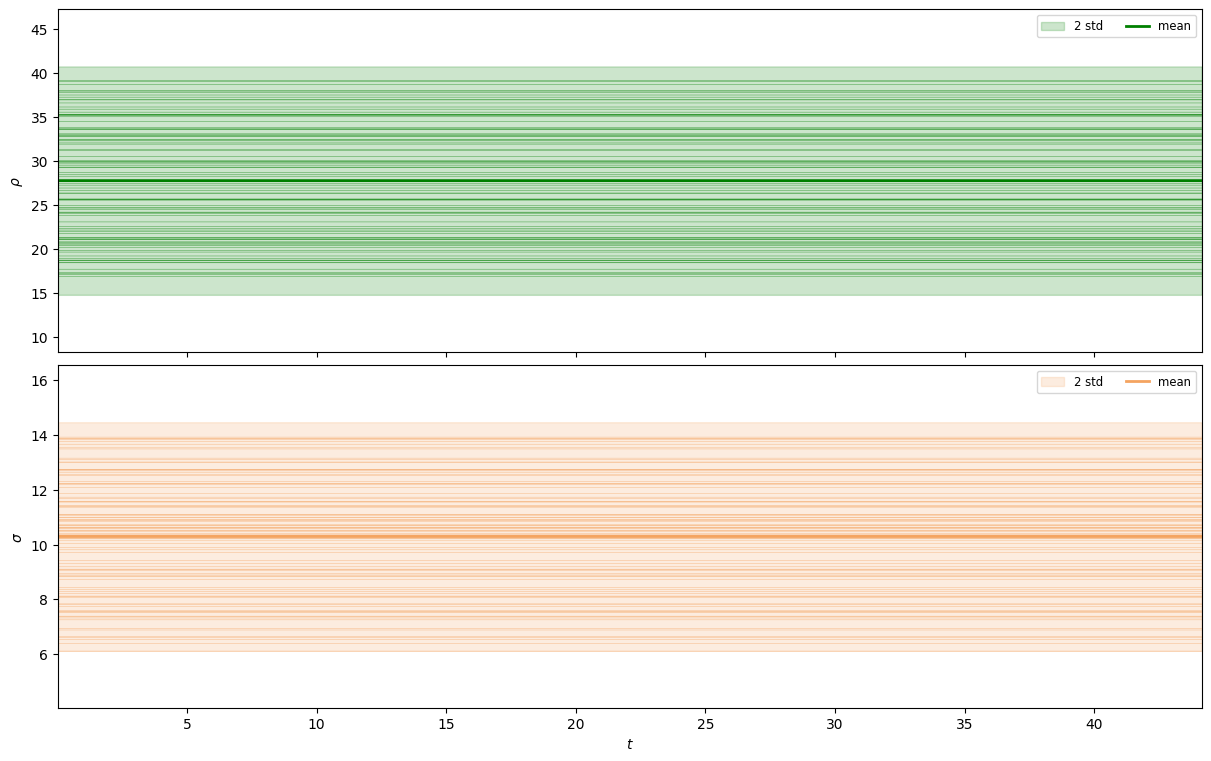

In [87]:

# Plot the parameters params
c = ['g', 'sandybrown', 'mediumpurple', 'cyan']
mean = np.mean(case.hist, -1, keepdims=True)

ii = case.Nphi
mean_p, hist_p, std_p, labels_p = [], [], [], []
for p in case.est_a:
    m_ = mean[:, ii].squeeze()
    s = 2*abs(np.std(case.hist[:, ii], axis=1))
    labels_p.append(case.params_labels[p])
    mean_p.append(m_)
    std_p.append(s)
    hist_p.append(case.hist[:, ii, :])
    ii += 1

colors_alpha = ['green', 'sandybrown', [0.7, 0.7, 0.87], 'blue', 'red', 'gold', 'deepskyblue']

fig = plt.figure(figsize=(12, 7.5), layout="constrained")
axs = fig.subplots(case.Na, 1, sharex='col')
if type(axs) is not np.ndarray:
    axs = [axs]
for ax, p, h, avg, s, c, lbl in zip(axs, case.est_a, hist_p, mean_p, std_p, colors_alpha, labels_p):
    ax.fill_between(case.hist_t, avg + abs(s), avg - abs(s), alpha=0.2, color=c, label='2 std')
    ax.plot(case.hist_t, avg, color=c, label='mean', lw=2)
    ax.plot(case.hist_t, h, color=c, lw=0.3, alpha=0.8)
    ax.legend(loc='upper right', fontsize='small', ncol=2)
    ax.set(ylabel=lbl, ylim=[np.min(avg) - 3/2*np.max(s), np.max(avg)+3/2*np.max(s)])
    if lbl == labels_p[-1]:
        ax.set(xlabel='$t$', xlim=[case.hist_t[0], case.hist_t[-1]])
        